In [1]:
import pandas as pd
import geopandas
import matplotlib
import matplotlib.pyplot as plt

Selecionando arbovirose

In [2]:
arbo_v = "dengue"
# arbo_v = "chikungunya"
# arbo_v = "zika"

ano_plotado = 2020

In [3]:
map = "./Map/Map.shp"

if arbo_v == "dengue":
    anos = 10
else:
    anos = 5
dados = f"../scr/{arbo_v}/casos_municipio_{anos}.csv"

bahia = geopandas.read_file(map)

bahia = bahia.rename(columns={"MUNICIPIO": "Município"})

df = pd.read_csv(dados)
df = df.drop(columns="Unnamed: 0")

In [4]:
for i in range (1, anos+2):
    bahia[f"{df.columns[1:][i]}"] = 0

for i in range (len(bahia)):
    for j in range (len(df)):
        if bahia.loc[i, "Município"] == df.loc[j, "Município"]:
            for k in range(1, anos+2):
                bahia.loc[i, f"{df.columns[1:][k]}"] = df.loc[j, f"{df.columns[1:][k]}"]


In [80]:
plt.rcParams["figure.figsize"] = (10, 10)

In [6]:
bahia[f"{ano_plotado}"].describe()

count      417.000000
mean       256.119904
std        809.672328
min          0.000000
25%         22.000000
50%         82.000000
75%        223.000000
max      12122.000000
Name: 2020, dtype: float64

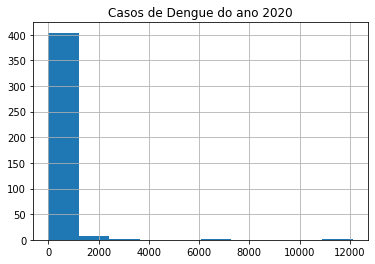

In [7]:
bahia.hist(column=f"{ano_plotado}")

if arbo_v == "dengue":
    plt.title(f"Casos de Dengue do ano {ano_plotado}")
elif arbo_v == "chikungunya":
    plt.title(f"Casos de Chikungunya do ano {ano_plotado}")
else:
    plt.title(f"Casos de Zika Vírus do ano {ano_plotado}")

Plotagem automatica

In [8]:
std_val = int(bahia[f"{ano_plotado}"].std())
max_val = bahia[f"{ano_plotado}"].max()
intervalo = [std_val, 2*std_val, 3*std_val, max_val]
intervalo

[809, 1618, 2427, 12122]

In [9]:
plt.rcParams["figure.figsize"] = (20, 20)

<AxesSubplot:>

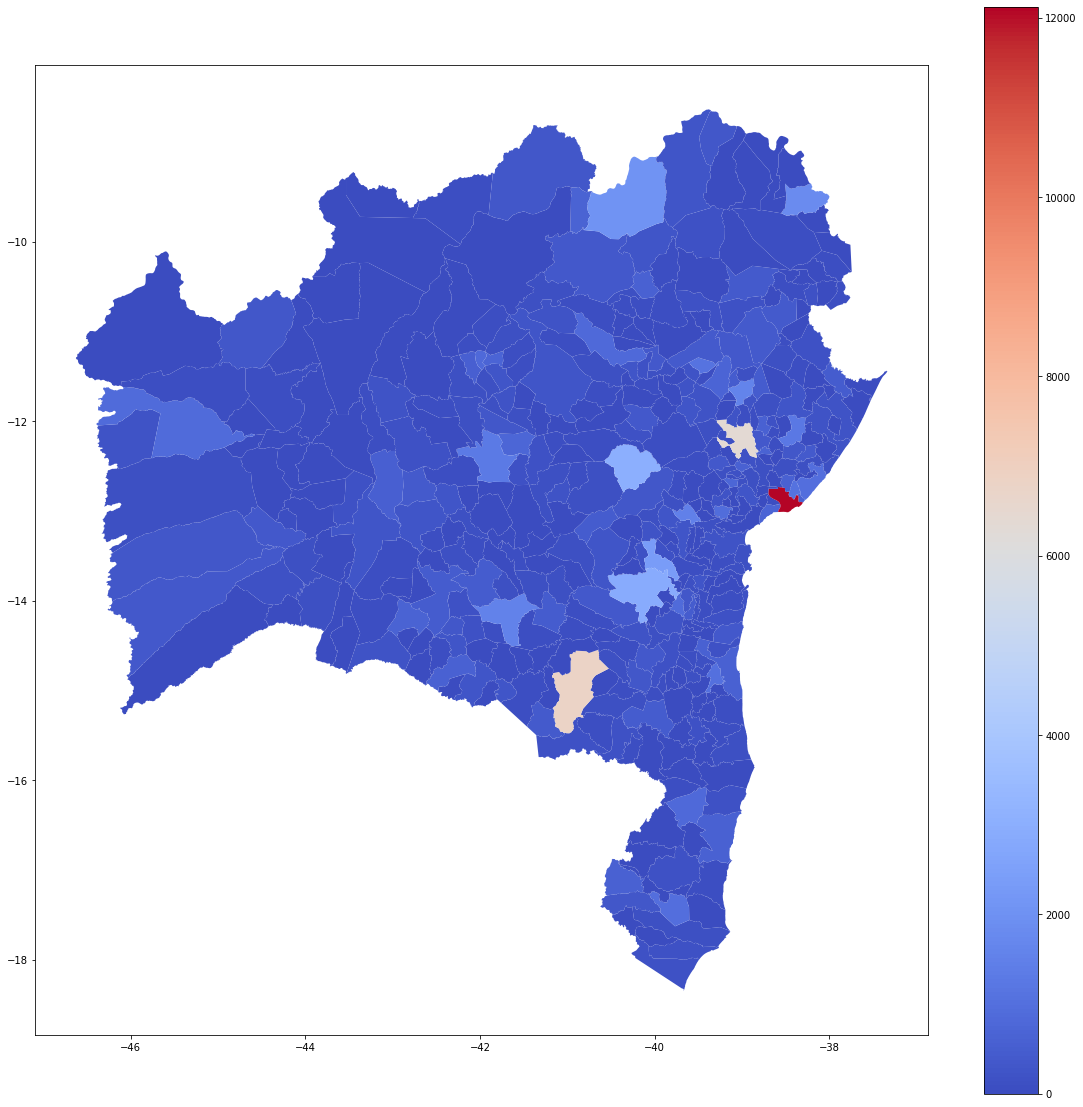

In [10]:
bahia.plot(column=f"{ano_plotado}", cmap='coolwarm', linewidth=1, legend=True)

Plotagem baseada em quantis

<AxesSubplot:>

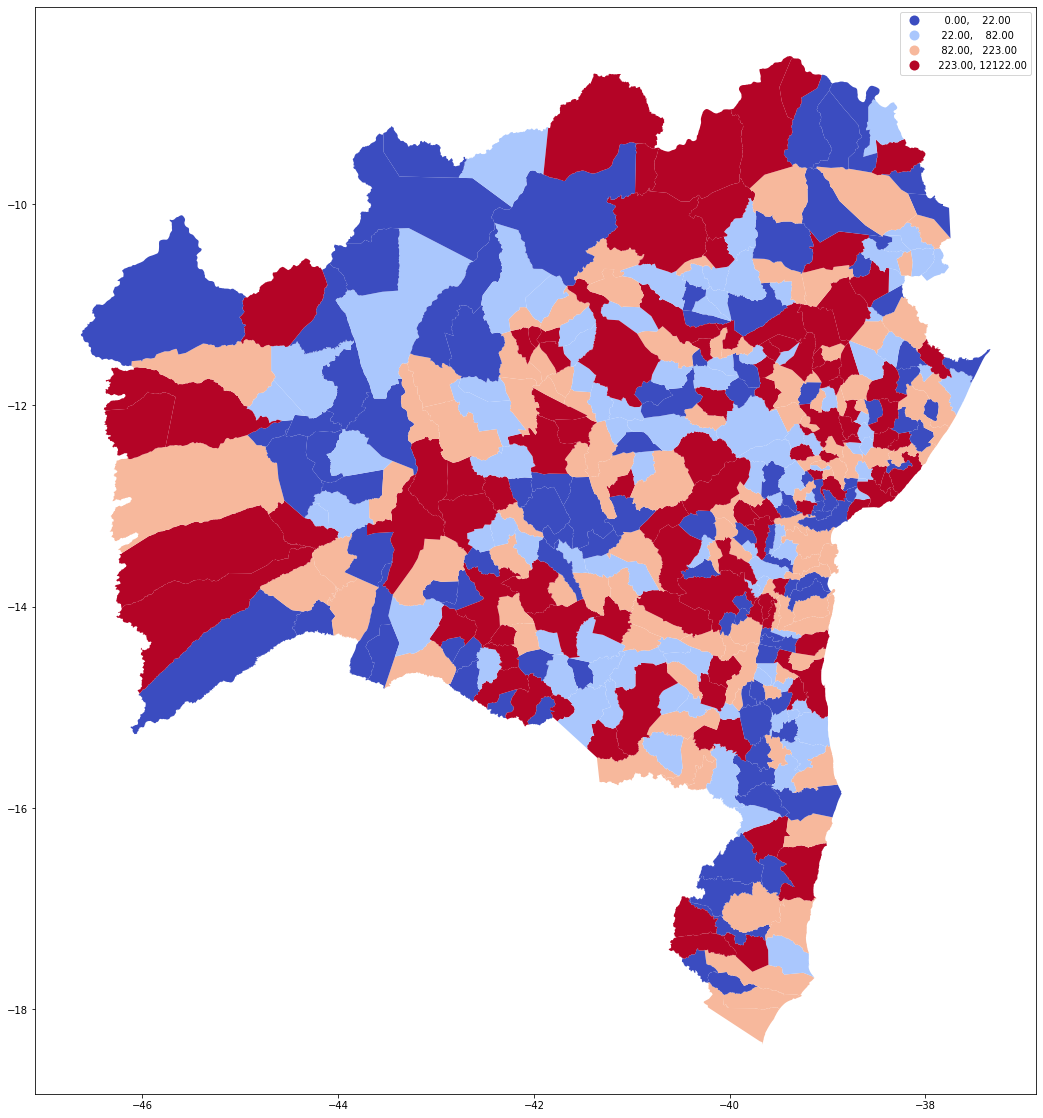

In [11]:
bahia.plot(column=f"{ano_plotado}", scheme='quantiles', k=4, cmap='coolwarm', linewidth=1, legend=True)

Plotagem baseada em desvio padrão

<AxesSubplot:>

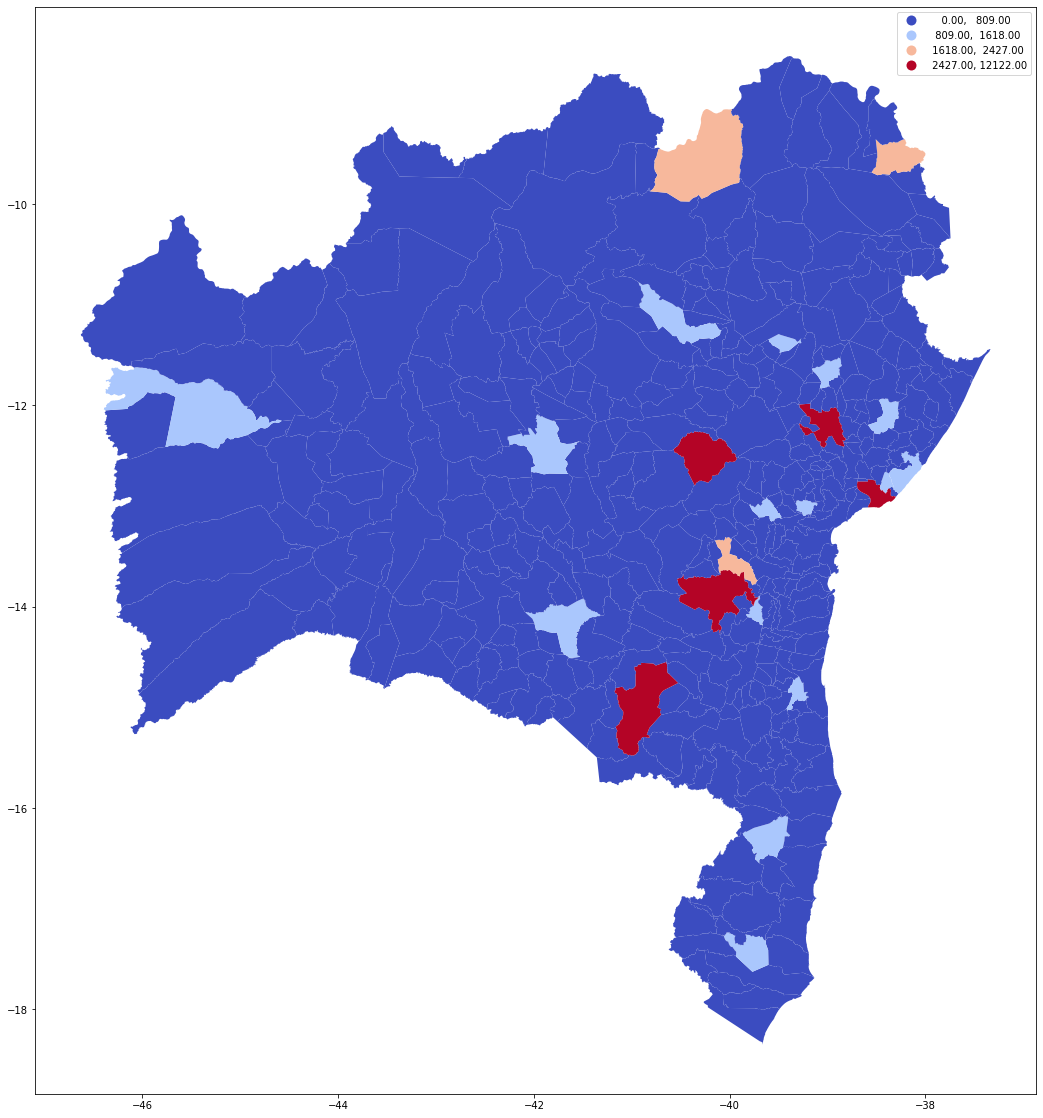

In [12]:
bahia.plot(column=f"{ano_plotado}", scheme='user_defined', classification_kwds={'bins':intervalo}, cmap='coolwarm', linewidth=1, legend=True)

In [ ]:
bahia.explore(column=f"{ano_plotado}", cmap='coolwarm')